In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from fooof.synth import *
from fooof import FOOOF, FOOOFGroup
from fooof.plts import plot_spectra
import seaborn as sns
from ratios import *
import pandas as pd

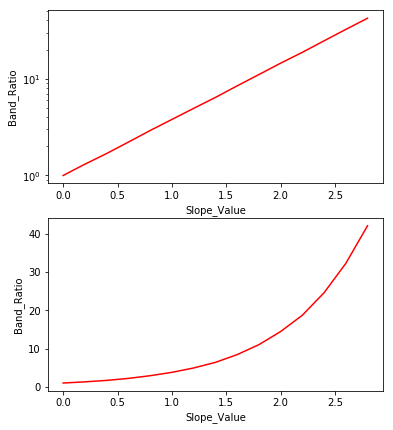

In [6]:

slope = np.load("../dat/apc_data.npy")

slope_syns = []

for val in slope[2]:
    slope_syns.append(val.aperiodic_params[1])

slope_ratios = []

for sl in slope[1]:
    slope_ratios.append(calc_band_ratio(slope[0], sl, THETA_BAND, BETA_BAND))

slope_cols = np.array([slope_ratios, slope_syns]).T.tolist()

df_slope = pd.DataFrame(slope_cols, columns=["Band_Ratio", "Slope"])

fig, ax = plt.subplots(2, 1, figsize=[6, 7])

ax[0].set_xlabel("Slope_Value")
ax[1].set_xlabel("Slope_Value")
ax[0].set_ylabel("Band_Ratio")
ax[1].set_ylabel("Band_Ratio")

# LOG SCALING
ax[0].set_yscale('log')
#ax[0].set_xscale('log')

ax[0].plot(df_slope.Slope, df_slope.Band_Ratio, color='r')
ax[1].plot(df_slope.Slope, df_slope.Band_Ratio, color='r')

plt.savefig("../figures/apc_vs_bandratio.png")

In [14]:
fs, ps, _ = gen_group_power_spectra(50, FREQ_RANGE, [0,1], [10,.5,.5] )
fg = FOOOFGroup()
fg.add_data(fs, ps)
fg.fit()

r1 = calc_group_band_ratio(fg, THETA_BAND, BETA_BAND, calc_band_ratio)
r2 = calc_group_band_ratio(fg, THETA_BAND, BETA_BAND, calc_density_ratio)

Running FOOOFGroup across 50 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is freq-res)
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



In [17]:
r2

[1.1006810612840994,
 1.0939192903138106,
 1.0936154687418451,
 1.0929038762222472,
 1.0942037668468203,
 1.0901425300382355,
 1.0935315090567452,
 1.094069587255413,
 1.0885193710613164,
 1.093166971683412,
 1.101138990842062,
 1.095830256034985,
 1.0972074403853336,
 1.1009339684880348,
 1.0979634828929334,
 1.0931671599973507,
 1.0848758623843815,
 1.0933922545269772,
 1.0859173324763176,
 1.0958907090280066,
 1.100705172268494,
 1.1027996826143944,
 1.0943740843561227,
 1.095568022133138,
 1.101091880451516,
 1.1017553014712875,
 1.091152634022338,
 1.10539823280441,
 1.0973760075600847,
 1.1038651973103388,
 1.1032987113481205,
 1.1017163165537858,
 1.098993185476627,
 1.1016588977790078,
 1.0843932474079996,
 1.1029531684322407,
 1.0905772085299401,
 1.0925233311979272,
 1.1019488521254348,
 1.0953648890150014,
 1.1008297860543317,
 1.1011359362230986,
 1.1001160480800407,
 1.1112388632499195,
 1.099425693858448,
 1.107289967911036,
 1.097558757674358,
 1.0934446028465294,
 1.086

In [44]:
fs = gen_freqs(FREQ_RANGE, FREQ_RES)

In [45]:
fs

array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
        6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5,
       12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5, 17. ,
       17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. , 22.5,
       23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. , 27.5, 28. ,
       28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5, 33. , 33.5,
       34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. , 38.5, 39. ,
       39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5, 44. , 44.5,
       45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. , 49.5, 50. ])

In [2]:
# Way to generate Data as outlined in out meeting on Friday
fs, ps = gen_power_spectrum(FREQ_RANGE, AP_DEF, ROT_OSC)
output = np.zeros(shape=(len(ROTS), len(DELS), len(fs)))

rot_freq_step = Stepper(ROT_FREQS[0], ROT_FREQS[1], ROT_INC)

for rot_ind, rot_val in enumerate(rot_freq_step):
    delta_step = Stepper(DEL_RANGE[0], DEL_RANGE[1], DEL_INC)
    for del_ind, del_val, in enumerate(delta_step):
        output[rot_ind, del_ind, :] = rotate_spectrum(fs, ps, del_val, rot_val)

np.save(ROT_DEL_PATH, output)

In [3]:
impt = np.load(ROT_DEL_PATH+".npy")
impt.shape
# [rotations, deltas, freqs]

(29, 10, 99)

In [24]:
len(impt[0])

10

In [27]:

ratios = np.zeros(shape =(len(impt), len(impt[0])) )
for rot_ind, rot_val in enumerate(impt):
    
    for del_ind, del_val in enumerate(impt[0]):
        psd = impt[rot_ind, del_ind,:]
        ratios[rot_ind, del_ind] = calc_band_ratio(fs, psd, THETA_BAND, BETA_BAND)

[1.00986653 0.80493174 0.70148362 0.64128049 0.57543108 0.5385402
 0.50529028 0.46958844 0.44913952 0.42104173 0.41165341 0.38861806
 0.38409058 0.36478207 0.35262829 0.34988232 0.38964742 0.66207256
 0.9904052  0.60294094 0.35412576 0.29840511 0.2866927  0.28477502
 0.27944498 0.27581554 0.27005592 0.25798242 0.2550743  0.25777678
 0.24717899 0.24628902 0.24628487 0.24120155 0.2364577  0.23784391
 0.22912587 0.22956458 0.22688329 0.21986119 0.21747167 0.21520054
 0.21116487 0.20804823 0.21133672 0.20596012 0.20450938 0.19834293
 0.20109559 0.19995242 0.19452332 0.19513918 0.19269514 0.19484035
 0.19020848 0.1890751  0.18871219 0.18688624 0.18240323 0.18027489
 0.18180249 0.17801586 0.17436385 0.1758681  0.17124827 0.16744799
 0.16752188 0.17065967 0.16785723 0.16646098 0.16499891 0.16498824
 0.16430665 0.16303546 0.16156064 0.16297669 0.15880716 0.160147
 0.15767441 0.15571535 0.1549167  0.15606276 0.15285447 0.15248427
 0.15173069 0.15106419 0.14978105 0.15046784 0.15192801 0.1498638

[1.85655507 1.11413811 0.79385356 0.62077452 0.49028917 0.4119214
 0.35200012 0.3012399  0.26763699 0.2347011  0.21590848 0.19272031
 0.18084599 0.16365695 0.15121609 0.14380454 0.15386715 0.25173461
 0.36329278 0.21374016 0.12151405 0.09925711 0.09256219 0.08935292
 0.08530605 0.08200285 0.07827227 0.07295858 0.07044443 0.06957536
 0.06524863 0.06362827 0.06231138 0.05979947 0.05747865 0.05671732
 0.05362786 0.0527624  0.05123012 0.04879381 0.04745621 0.04619344
 0.04460357 0.04325936 0.04327224 0.04154124 0.0406452  0.03885477
 0.03884082 0.03808837 0.03655394 0.03618397 0.03526631 0.03520383
 0.03393619 0.0333186  0.03285226 0.03214739 0.03100927 0.03029488
 0.03020581 0.02924726 0.02833318 0.02826914 0.02723393 0.02635072
 0.02609036 0.02630882 0.02561747 0.02515339 0.02468955 0.02445073
 0.02411892 0.0237085  0.02327721 0.02326735 0.02246822 0.02245664
 0.02191609 0.0214564  0.02116379 0.02114022 0.02053277 0.02031406
 0.02004885 0.0197999  0.01947529 0.01941045 0.01944612 0.01903

[0.99576053 0.97302612 1.00355857 1.0030176  0.9868934  0.99104019
 1.00225565 0.99863221 0.98250246 1.00080297 0.99668631 1.00474067
 1.00488758 0.99041752 0.98774444 1.00699151 1.18081619 2.01320775
 3.24212445 2.03606424 1.16675783 1.01821829 1.01130778 0.99774186
 0.98503636 0.9967327  0.99431486 0.99961512 0.98940934 0.99256407
 0.99137043 1.0023385  0.9876755  0.98120601 0.97454351 0.98698273
 1.00099079 1.00340738 0.99465622 0.98500378 1.01145387 1.00608836
 1.03858762 0.99116596 0.99192574 0.98931556 1.01593859 0.97996527
 0.97513406 1.00788627 1.01817055 1.00512527 1.02303396 0.98504982
 1.01374223 0.99312727 0.9947808  1.01228911 0.98305593 0.98696182
 1.01521124 1.00878591 1.01467147 0.98790059 0.99133922 0.99791993
 0.99155761 1.02045349 1.00242818 1.00392218 0.98708057 0.98628568
 1.009991   0.9927489  0.99177516 0.99684222 0.99480463 0.99190425
 1.00033191 1.00068608 0.98355869 1.01980922 0.99356796 1.00899228
 1.00413299 1.00915876 1.02329129 1.01761828 1.02535519 1.0064

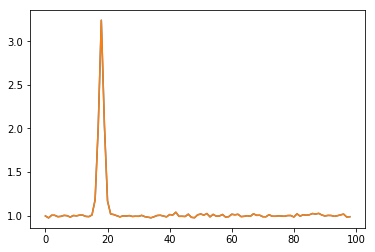

In [14]:
# The 2nd argument is 'FREQ_RANGE[1]+.5' because gen_power_spectrum includes the upper bound. 
# when given [1,50], 50 is included in fs is this okay?
freqs = gen_freqs([FREQ_RANGE[0], FREQ_RANGE[1]], FREQ_RES)
#np.arange(FREQ_RANGE[0], FREQ_RANGE[1]+.5, FREQ_RES)

# Here are the two power spectra both rotated at different frequencies but by the same amount
psd_1 = impt[:,26,0]
psd_2 = impt[:,1,0]
print(psd_1)
print(psd_2)
plt.plot(psd_1)
plt.plot(psd_2)

# As we can see, these plots are VERY different.
# We will now calculate the TBR for each PSD

ratio_1 = calc_band_ratio(freqs, psd_1, THETA_BAND, BETA_BAND)
ratio_2 = calc_band_ratio(freqs, psd_2, THETA_BAND, BETA_BAND)

print("ratio_1: ", ratio_1)
print("ratio_2: ", ratio_2)

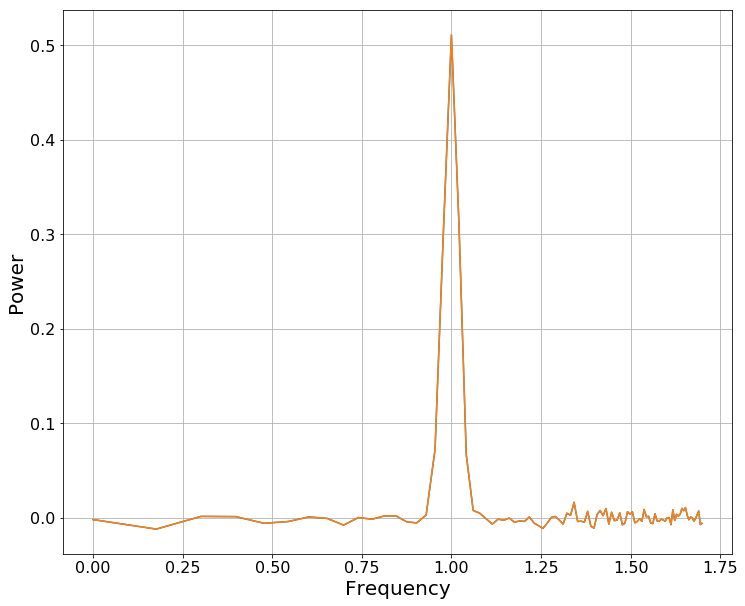

In [15]:
plot_spectra(fs, [psd_1, psd_2], log_freqs=True, log_powers=True)

In [4]:
impt

array([[[1.00986653, 0.80493174, 0.70148362, ..., 0.14145617,
         0.14471852, 0.14389038],
        [1.00986653, 0.77294738, 0.65450736, ..., 0.09585224,
         0.09796334, 0.09730491],
        [1.00986653, 0.74223393, 0.61067696, ..., 0.06495053,
         0.06631367, 0.0658018 ],
        ...,
        [1.00986653, 0.60603146, 0.43181382, ..., 0.00927865,
         0.00942542, 0.00930578],
        [1.00986653, 0.5819505 , 0.40289654, ..., 0.00628731,
         0.00638028, 0.00629297],
        [1.00986653, 0.55882641, 0.37591577, ..., 0.00426035,
         0.00431896, 0.00425558]],

       [[0.71408347, 0.56917269, 0.49602383, ..., 0.10002462,
         0.10233145, 0.10174587],
        [0.76533571, 0.58578457, 0.49602383, ..., 0.07264242,
         0.07424233, 0.07374333],
        [0.82026651, 0.60288129, 0.49602383, ..., 0.05275622,
         0.05386344, 0.05344767],
        ...,
        [1.16003202, 0.69614735, 0.49602383, ..., 0.01065837,
         0.01082696, 0.01068953],
        [1.2

In [17]:
len(impt)

29

In [28]:
pd.DataFrame(ratios)

,0,1,2,3,4,5,6,7,8,9
0,1.937479,2.213127,2.528195,2.888349,3.300072,3.770788,4.30899,4.924403,5.628157,6.432995
1,1.937479,2.213127,2.528195,2.888349,3.300072,3.770788,4.30899,4.924403,5.628157,6.432995
2,1.937479,2.213127,2.528195,2.888349,3.300072,3.770788,4.30899,4.924403,5.628157,6.432995
3,1.937479,2.213127,2.528195,2.888349,3.300072,3.770788,4.30899,4.924403,5.628157,6.432995
4,1.937479,2.213127,2.528195,2.888349,3.300072,3.770788,4.30899,4.924403,5.628157,6.432995
5,1.937479,2.213127,2.528195,2.888349,3.300072,3.770788,4.30899,4.924403,5.628157,6.432995
6,1.937479,2.213127,2.528195,2.888349,3.300072,3.770788,4.30899,4.924403,5.628157,6.432995
7,1.937479,2.213127,2.528195,2.888349,3.300072,3.770788,4.30899,4.924403,5.628157,6.432995
8,1.937479,2.213127,2.528195,2.888349,3.300072,3.770788,4.30899,4.924403,5.628157,6.432995
9,1.937479,2.213127,2.528195,2.888349,3.300072,3.770788,4.30899,4.924403,5.628157,6.432995


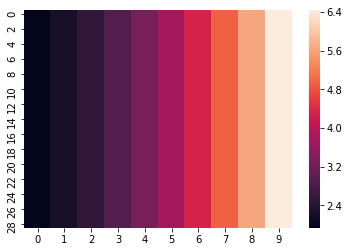

In [29]:
sns.heatmap(ratios)

In [19]:
from fooof.synth.transform import calc_rotation_offset, translate_spectrum

In [20]:
fs, ps = gen_power_spectrum(FREQ_RANGE, AP_DEF, ROT_OSC)
ps1 = rotate_spectrum(fs, ps, 1, 10)
ps2 = rotate_spectrum(fs, ps, 0.5, 20)

In [84]:
off_1 = calc_rotation_offset(1, 10)
off_2 = calc_rotation_offset(1, 20)
print(off_1, off_2)

1.0 1.3010299956639813


In [87]:
ps1 = translate_spectrum(ps1, -off_1)
ps2 = translate_spectrum(ps2, -off_2)

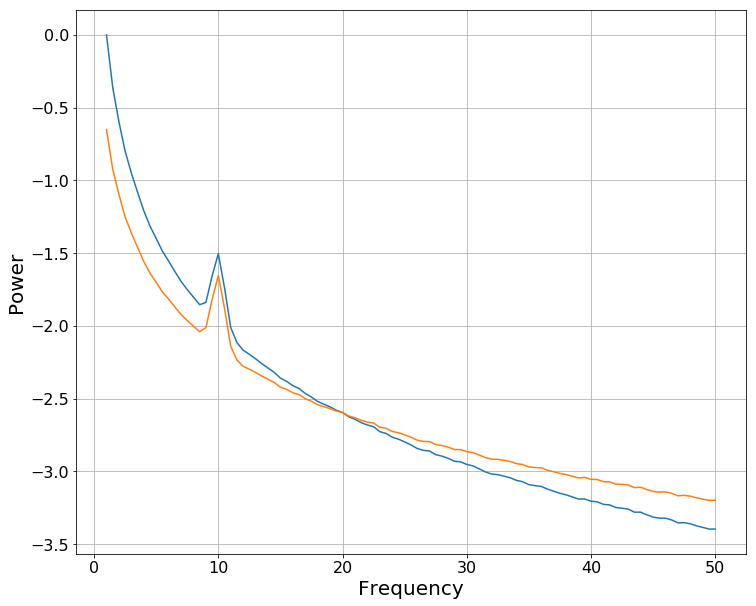

In [88]:
plot_spectra(fs, [ps1, ps2], False, True)

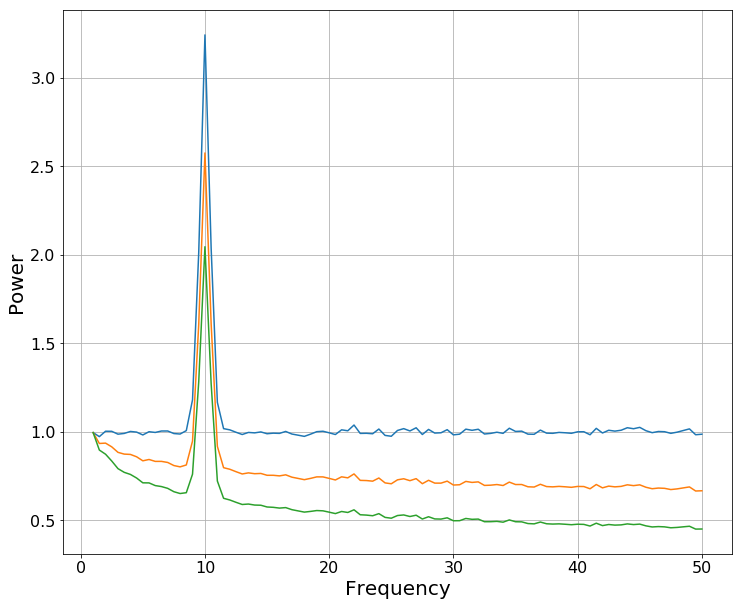

In [23]:
plot_spectra(fs, [impt[:, 0, 0], impt[:, 0, 1], impt[:, 0, 2]])

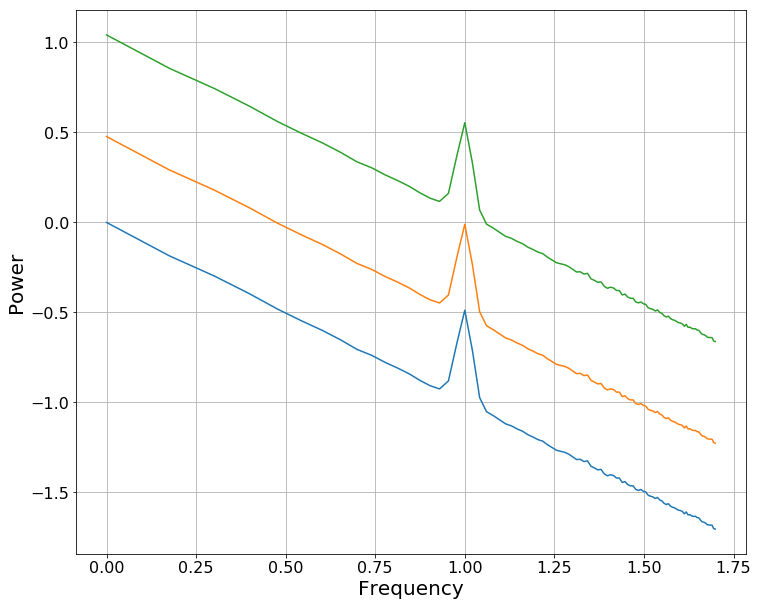

In [29]:
plot_spectra(fs, [impt[:, 0, 10], impt[:, 2, 10], impt[:, 10, 10]], True, True)

In [10]:
output = np.zeros(shape=(len(APCS), len(AMPS), len(fs)))
slope_step = Stepper(APC_START, APC_END, APC_INC)
for sl_ind, sl_val in enumerate(slope_step):

    # Low band sweeps through amplitude range
    amp_low_step = Stepper(AMP_START, AMP_END, AMP_INC)
    amp_iter_low = param_iter([CF_LOW_DEF, amp_low_step, BW_DEF, CF_HIGH_DEF, AMP_DEF, BW_DEF])
    
    for amp_ind, amp_val in enumerate(amp_iter_low):        
        fs, amp_low_ps = gen_power_spectrum(FREQ_RANGE, [0,sl_val], amp_val)
        output[sl_ind, amp_ind, :] = amp_low_ps

np.save(APC_AMP_LOW_PATH, output)

In [11]:
impt = np.load(APC_AMP_LOW_PATH+".npy")
impt.shape

(12, 15, 99)

In [12]:

ratios = np.zeros(shape=(len(impt), len(impt[0])) )
for apc_ind, apc_val in enumerate(impt):
    
    for amp_ind, amp_val in enumerate(impt[0]):
        psd = impt[apc_ind, amp_ind, :]
        
        
        ratios[apc_ind, amp_ind] = calc_band_ratio(fs, psd, THETA_BAND, BETA_BAND)

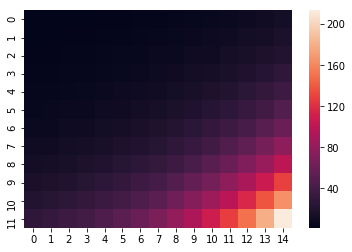

In [13]:
sns.heatmap(ratios)

In [8]:
pd.DataFrame(ratios)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2.372801,2.728284,3.086770,3.533835,4.085159,4.718988,5.506803,6.384545,7.508714,8.885701,10.450751,12.404094,14.934132,17.831460,21.316362
1,2.399473,2.720866,3.092257,3.533787,4.097030,4.738242,5.455588,6.351016,7.524625,8.848601,10.553765,12.502838,14.906474,17.633752,21.171252
2,2.416926,2.722760,3.088145,3.521024,4.093301,4.709504,5.488026,6.429868,7.411971,8.893689,10.516620,12.509065,14.705655,17.629876,21.200408
3,2.403480,2.712706,3.092453,3.548918,4.060756,4.724181,5.504990,6.461242,7.492627,8.819015,10.512315,12.426138,14.710134,17.737955,21.409826
4,2.398919,2.710033,3.098663,3.532302,4.067780,4.697427,5.530587,6.404761,7.550292,8.809420,10.501066,12.490029,14.872339,17.676616,21.269759
5,2.404312,2.717467,3.148751,3.579738,4.041596,4.748501,5.484848,6.413176,7.494529,8.983336,10.524673,12.532121,14.847191,17.741070,21.207012
6,2.404019,2.693915,3.108366,3.540067,4.078624,4.696180,5.492871,6.440488,7.485002,8.883392,10.490369,12.356079,14.896268,17.752429,21.165635
7,2.408428,2.699193,3.089394,3.528954,4.072873,4.724063,5.490202,6.374928,7.535615,8.856070,10.533424,12.403754,14.761591,17.745440,21.435810
8,2.392998,2.706669,3.081728,3.568151,4.059788,4.744395,5.439116,6.455604,7.438547,8.869323,10.511110,12.518892,14.816295,17.761949,21.263041
9,2.405823,2.698629,3.076712,3.534330,4.086429,4.707420,5.497157,6.428643,7.473862,8.807699,10.482151,12.301290,14.809572,17.817304,21.332332


In [20]:
len(Stepper(BW_START, BW_END, BW_INC)) == len(BWS)

True

In [31]:
bw_step = Stepper(BW_START, BW_END, BW_INC)

In [34]:
next(bw_step)

0.4

In [38]:
output = np.zeros(shape=(len(CFS_LOW), len(BWS), len(fs)))
cf_low_step = Stepper(LOW_BAND[0], LOW_BAND[1], CF_LOW_INC)

for cf_ind, cf_val in enumerate(cf_low_step):
    
    bw_step = Stepper(BW_START, BW_END, BW_INC)
    params = [cf_val, AMP_DEF, bw_step, CF_HIGH_DEF, AMP_DEF, BW_DEF]
    for bw_ind, bw_val in enumerate(bw_step):
        print(bw_val)
        curr_osc = params
        curr_osc[2] = bw_val
        print(curr_osc)
        fs, bw_ps, = gen_power_spectrum(FREQ_RANGE, [0, APC_DEF], curr_osc)
        
        output[cf_ind, bw_ind, :] = bw_ps

np.save(CF_BW_LOW_PATH, output)


0.2
[4.0, 0.75, 0.2, 21.5, 0.75, 1]
0.30000000000000004
[4.0, 0.75, 0.30000000000000004, 21.5, 0.75, 1]
0.4000000000000001
[4.0, 0.75, 0.4000000000000001, 21.5, 0.75, 1]
0.5000000000000001
[4.0, 0.75, 0.5000000000000001, 21.5, 0.75, 1]
0.6000000000000001
[4.0, 0.75, 0.6000000000000001, 21.5, 0.75, 1]
0.7000000000000002
[4.0, 0.75, 0.7000000000000002, 21.5, 0.75, 1]
0.8000000000000003
[4.0, 0.75, 0.8000000000000003, 21.5, 0.75, 1]
0.9000000000000001
[4.0, 0.75, 0.9000000000000001, 21.5, 0.75, 1]
1.0000000000000002
[4.0, 0.75, 1.0000000000000002, 21.5, 0.75, 1]
1.1000000000000003
[4.0, 0.75, 1.1000000000000003, 21.5, 0.75, 1]
1.2000000000000004
[4.0, 0.75, 1.2000000000000004, 21.5, 0.75, 1]
1.3000000000000003
[4.0, 0.75, 1.3000000000000003, 21.5, 0.75, 1]
1.4000000000000004
[4.0, 0.75, 1.4000000000000004, 21.5, 0.75, 1]
1.5000000000000004
[4.0, 0.75, 1.5000000000000004, 21.5, 0.75, 1]
1.6000000000000003
[4.0, 0.75, 1.6000000000000003, 21.5, 0.75, 1]
1.7000000000000004
[4.0, 0.75, 1.70000

In [40]:
output

array([[[0.985404  , 0.67214499, 0.50188848, ..., 0.02043786,
         0.02047078, 0.01987615],
        [0.99276795, 0.66209639, 0.49664624, ..., 0.02064818,
         0.02065823, 0.02016734],
        [0.99812489, 0.6664158 , 0.50095321, ..., 0.01999734,
         0.02021772, 0.02008597],
        ...,
        [3.45292483, 2.63443263, 2.19165111, ..., 0.02013049,
         0.02012005, 0.02012064],
        [3.59611362, 2.7115722 , 2.22256401, ..., 0.02084884,
         0.02053928, 0.01978033],
        [3.65011933, 2.7377073 , 2.26775963, ..., 0.02037664,
         0.02022309, 0.01972878]],

       [[0.98567358, 0.66161628, 0.51179854, ..., 0.02021875,
         0.02008391, 0.01989273],
        [0.98076998, 0.65743977, 0.50901248, ..., 0.0201946 ,
         0.02094062, 0.02015368],
        [1.02125671, 0.66929621, 0.50565034, ..., 0.02089215,
         0.02006561, 0.01996813],
        ...,
        [3.18688482, 2.50137665, 2.10600715, ..., 0.02022069,
         0.02011548, 0.01965358],
        [3.3

In [41]:
impt = np.load(CF_BW_LOW_PATH+".npy")
impt.shape

(16, 38, 99)

In [42]:

ratios = np.zeros(shape=(len(impt), len(impt[0])) )
for apc_ind, apc_val in enumerate(impt):
    
    for amp_ind, amp_val in enumerate(impt[0]):
        psd = impt[apc_ind, amp_ind, :]
        
        
        ratios[apc_ind, amp_ind] = calc_band_ratio(fs, psd, THETA_BAND, BETA_BAND)

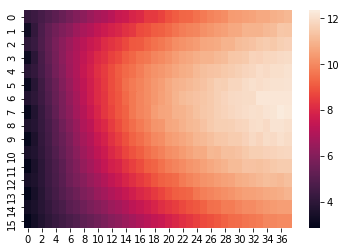

In [43]:
sns.heatmap(ratios)